In [1]:
#Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import time
import timeit


import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

import datetime
import math
from collections import Counter

In [2]:
#import files
ac = pd.read_csv("C:/Users/HP NOTEBOOK/Desktop/project/Accident_Information.csv",encoding='latin1', low_memory=False, chunksize=30000)
vc = pd.read_csv("C:/Users/HP NOTEBOOK/Desktop/project/Vehicle_Information.csv",encoding='latin1', low_memory=False, chunksize=30000)

In [3]:
#chunk cleaning and dataframing for accident column
acchunk = []
for chunk in ac:
    acchunk_filter = chunk[
        (chunk.Year.astype(int) >= 2010) &
        (chunk.Year.astype(int) <= 2017) &
        (chunk['Road_Type'] != "Unknown") &
        (chunk['Junction_Control'] != "Data missing or out of range") &
        (chunk['Carriageway_Hazards'] != "Data missing or out of range") &
        (chunk['Junction_Detail'] != "Data missing or out of range") &
        (chunk['Road_Surface_Conditions'] != "Data missing or out of range") &
        (chunk['Special_Conditions_at_Site'] != "Data missing or out of range") &
        (chunk['Weather_Conditions'] != "Data missing or out of range") &
        (chunk['Latitude'].notnull()) &
        (chunk['Longitude'].notnull())
    ]
    acchunk.append(acchunk_filter)
df1 = pd.concat(acchunk)

In [4]:
#chunk cleaning for vehicles column
vcchunk = []
for chunk2 in vc:
    vcchunk_filter = chunk2[
        (chunk2.Year.astype(int) >= 2010)&
        (chunk2.Year.astype(int) <= 2017) &
        (chunk2['Driver_Home_Area_Type'] != "Data missing or out of range") &
        (chunk2['Journey_Purpose_of_Driver'] != "Data missing or out of range") &
        (chunk2['Junction_Location'] != "Data missing or out of range") &
        (chunk2['Was_Vehicle_Left_Hand_Drive'] != "Data missing or out of range") &
        (chunk2['Hit_Object_in_Carriageway'] != "Data missing or out of range") &
        (chunk2['Skidding_and_Overturning'] != "Data missing or out of range") &
        (chunk2['Towing_and_Articulation'] != "Data missing or out of range") &
        (chunk2['Vehicle_Leaving_Carriageway'] != "Data missing or out of range") &
        (chunk2['Vehicle_Manoeuvre'] != "Data missing or out of range") &
        (chunk2['Vehicle_Type'] != "Data missing or out of range") &
        (chunk2['X1st_Point_of_Impact'] != "Data missing or out of range") &
        (chunk2['Sex_of_Driver'] != "Data missing or out of range") &
        (chunk2['Age_Band_of_Driver'] != "Data missing or out of range")
        
    ]
    vcchunk.append(vcchunk_filter)
df2 = pd.concat(vcchunk)

In [5]:
#check columns
print("Accident's Columns:\n",df1.columns, "\n")

print("Vehicle's Columns:\n",df2.columns)

Accident's Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland'],
      dtype='object') 

Vehicle's Columns:
 Index(['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', '

In [6]:
print('Accident Shape', df1.shape)
print('Vehicle Shape',df2.shape)

Accident Shape (691195, 34)
Vehicle Shape (1167198, 24)


In [7]:
#merge dataframes
df = pd.merge(df1,df2)

In [8]:
#check columns
print("Names of Combined Columns:\n",df.columns, "\n")
print("\nShape:\n",df.shape)

Names of Combined Columns:
 Index(['Accident_Index', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class',
       '2nd_Road_Number', 'Accident_Severity', 'Carriageway_Hazards', 'Date',
       'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Junction_Control', 'Junction_Detail', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'LSOA_of_Accident_Location', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Police_Force',
       'Road_Surface_Conditions', 'Road_Type', 'Special_Conditions_at_Site',
       'Speed_limit', 'Time', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Year', 'InScotland', 'Age_Band_of_Driver', 'Age_of_Vehicle',
       'Driver_Home_Area_Type', 'Driver_IMD_Decile', 'Engine_Capacity_.CC.',
       'Hit_Object_in_Carriageway', 'Hit

In [9]:
df.describe(include ='all')

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact
count,720280,720280,720280.000000,699431,710979.000000,720280,720280,720280,720280,720279.000000,...,720280,720280,720280,720280,720269.000000,720280,720280.000000,720280,720280,720280
unique,488010,6,NaN,6,NaN,3,6,2557,7,NaN,...,3,6,6,9,NaN,18,NaN,20,2,5
top,2016140142191,A,NaN,Unclassified,NaN,Slight,None,2015-05-13,Friday,NaN,...,Male,None,No tow/articulation,Did not leave carriageway,NaN,Going ahead other,NaN,Car,No,Front
freq,15,365390,NaN,473098,NaN,626656,714068,515,119324,NaN,...,484205,659742,713570,663463,NaN,314008,NaN,534189,719140,354438
mean,NaN,NaN,1051.470728,NaN,607.761499,NaN,NaN,NaN,NaN,1.147353,...,NaN,NaN,NaN,NaN,0.086026,NaN,1.506420,NaN,NaN,NaN
std,NaN,NaN,1825.784600,NaN,1593.978070,NaN,NaN,NaN,NaN,0.357791,...,NaN,NaN,NaN,NaN,0.784117,NaN,0.644346,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,NaN,191.000000,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,NaN,900.000000,NaN,173.000000,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,NaN,NaN,NaN


In [10]:
#check corr b/t Location_Easting_OSGR & Location_Northing_OSGR AND Longitude and Latitude

print(df['Location_Easting_OSGR'].corr(df['Longitude']))


print(df['Location_Northing_OSGR'].corr(df['Latitude']))

0.9994257015446176
0.9999733124707395


In [11]:
#drop Location_Easting_OSGR & Location_Northing_OSGR
#because they are the similar to Latitude and Longitude 

df = df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis=1)

In [12]:
df.shape

(720280, 54)

In [13]:
#standardize all column names to lowercase, and remove some characters 
#for ease of use in querying
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace('.','')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')

In [14]:
#convert date/time to datetime datatype

df['date'] = pd.to_datetime((df['date']), format= "%Y-%m-%d")


In [15]:
#mistyped datatypes

df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number','driver_imd_decile',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']]= df[['did_police_officer_attend_scene_of_accident',
    'driver_imd_decile','vehicle_reference',
    'vehicle_locationrestricted_lane','1st_road_number',
    '2nd_road_number','driver_imd_decile',
    'pedestrian_crossing-physical_facilities',
   'pedestrian_crossing-human_control']].astype('object')

In [16]:
df.columns.to_series().groupby(df.dtypes).groups

{datetime64[ns]: ['date'], int64: ['number_of_casualties', 'number_of_vehicles', 'year'], float64: ['latitude', 'longitude', 'speed_limit', 'age_of_vehicle', 'engine_capacity_cc'], object: ['accident_index', '1st_road_class', '1st_road_number', '2nd_road_class', '2nd_road_number', 'accident_severity', 'carriageway_hazards', 'day_of_week', 'did_police_officer_attend_scene_of_accident', 'junction_control', 'junction_detail', 'light_conditions', 'local_authority_district', 'local_authority_highway', 'lsoa_of_accident_location', 'pedestrian_crossing-human_control', 'pedestrian_crossing-physical_facilities', 'police_force', 'road_surface_conditions', 'road_type', 'special_conditions_at_site', 'time', 'urban_or_rural_area', 'weather_conditions', 'inscotland', 'age_band_of_driver', 'driver_home_area_type', 'driver_imd_decile', 'hit_object_in_carriageway', 'hit_object_off_carriageway', 'journey_purpose_of_driver', 'junction_location', 'make', 'model', 'propulsion_code', 'sex_of_driver', 'skidd

In [17]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

driver_imd_decile                              25.118565
age_of_vehicle                                 15.287805
model                                          11.636447
engine_capacity_cc                             11.283251
propulsion_code                                10.899928
make                                            5.846476
lsoa_of_accident_location                       5.674738
2nd_road_class                                  2.894569
2nd_road_number                                 1.291303
pedestrian_crossing-physical_facilities         0.006109
pedestrian_crossing-human_control               0.005276
time                                            0.004582
speed_limit                                     0.001805
vehicle_locationrestricted_lane                 0.001527
did_police_officer_attend_scene_of_accident     0.000139
day_of_week                                     0.000000
1st_road_class                                  0.000000
number_of_vehicles             

In [18]:
# #2nd_road_class
df['2nd_road_class'].value_counts()/df.shape[0]*100

Unclassified    65.682512
A               15.892292
C                7.591909
B                6.494558
Motorway         1.301716
A(M)             0.142445
Name: 2nd_road_class, dtype: float64

In [19]:
df = df.drop(['2nd_road_class'], axis=1)

In [20]:
#driver_imd_decile
df['driver_imd_decile'].value_counts()/df.shape[0]*100

2.0     8.366469
3.0     8.281640
4.0     7.986339
1.0     7.888321
5.0     7.717554
6.0     7.530683
7.0     7.195674
8.0     6.948270
9.0     6.803049
10.0    6.163436
Name: driver_imd_decile, dtype: float64

In [21]:
df['driver_imd_decile'].fillna(method='ffill', inplace=True)

In [22]:
df['age_of_vehicle'].describe()

count    610165.000000
mean          7.567473
std           4.751567
min           1.000000
25%           4.000000
50%           7.000000
75%          11.000000
max         105.000000
Name: age_of_vehicle, dtype: float64

In [23]:
df['age_of_vehicle'].median()

7.0

In [24]:
#fillna by 7 
df['age_of_vehicle'].fillna(7, inplace=True)

#group age_of_vehicle
#1=0-3, 2=3-5, 3=5-8, 4=8-11, 5=
def fixedvehicleage(age):
    if age>=0 and age<=120:
        return age
    else:
        return np.nan

df['age_of_vehicle'] = df['age_of_vehicle'].apply(fixedvehicleage)


df['age_of_vehicle'] = pd.cut(df['age_of_vehicle'], 
                             [0,2,5,8,11,14,17,120], labels=['1', '2', '3','4','5','6','7'])

In [25]:
#model
df['model'].value_counts()/df.shape[0]*100

MISSING                        0.743183
KA                             0.336675
CLIO DYNAMIQUE 16V             0.279058
FIESTA ZETEC                   0.247681
SPRINTER 313 CDI               0.236158
                                 ...   
CADDY MAXI C20 T-LINE TDI B    0.000139
QASHQAI TEKNA DCI + 2          0.000139
TPORTER T30 S-LINE TDI BMT     0.000139
306 XS 16V                     0.000139
CBX 750 FE                     0.000139
Name: model, Length: 28664, dtype: float64

In [26]:
df['model'].describe()

count      636465
unique      28664
top       MISSING
freq         5353
Name: model, dtype: object

In [27]:
df['model'].fillna(method='ffill', inplace=True)

In [28]:
#engine_capacity_cc
df['engine_capacity_cc'].describe()

count    639009.000000
mean       1848.094816
std        1573.057956
min           2.000000
25%        1248.000000
50%        1598.000000
75%        1995.000000
max       91000.000000
Name: engine_capacity_cc, dtype: float64

In [29]:
#(determine the min and max cuttoffs for detecting the outlier)
q75, q25 = np.percentile(df['engine_capacity_cc'].dropna(), [75 ,25])
iqr = q75 - q25
 
ecmin = q25 - (iqr*1.5)
ecmax = q75 + (iqr*1.5)

print(ecmax)
print(ecmin)

3115.5
127.5


In [30]:
df = df[df['engine_capacity_cc']<=ecmax]

In [31]:
df = df[df['engine_capacity_cc']>=ecmin]

<AxesSubplot:>

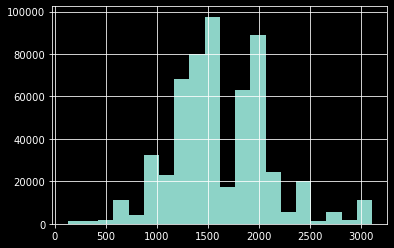

In [114]:
df['engine_capacity_cc'].hist(bins=20)

In [33]:
#check values of 'engine_capacity_cc'
df['engine_capacity_cc'].describe()

count    569057.000000
mean       1633.351432
std         473.765085
min         128.000000
25%        1299.000000
50%        1598.000000
75%        1968.000000
max        3110.000000
Name: engine_capacity_cc, dtype: float64

In [34]:
df['engine_capacity_cc'].mean()

1633.3514322818276

In [35]:
df['engine_capacity_cc'].fillna(1652, inplace=True)

In [36]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

lsoa_of_accident_location                      5.902045
2nd_road_number                                1.317618
make                                           0.063087
pedestrian_crossing-human_control              0.005448
pedestrian_crossing-physical_facilities        0.005096
time                                           0.003866
vehicle_locationrestricted_lane                0.001406
speed_limit                                    0.001230
did_police_officer_attend_scene_of_accident    0.000176
date                                           0.000000
accident_severity                              0.000000
road_type                                      0.000000
road_surface_conditions                        0.000000
police_force                                   0.000000
1st_road_class                                 0.000000
1st_road_number                                0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0

In [37]:
# #lsoa_of_accident_location
df['lsoa_of_accident_location'].value_counts()

E01032739    440
E01004736    412
E01000004    410
E01018648    303
E01004689    261
            ... 
E01033427      1
E01026104      1
E01029192      1
E01030771      1
E01016340      1
Name: lsoa_of_accident_location, Length: 33936, dtype: int64

In [38]:
df['lsoa_of_accident_location'].describe()

count        535471
unique        33936
top       E01032739
freq            440
Name: lsoa_of_accident_location, dtype: object

In [39]:
df['lsoa_of_accident_location'].fillna(method='ffill', inplace=True)

In [40]:
#### Check nulls for again
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

2nd_road_number                                1.317618
make                                           0.063087
pedestrian_crossing-human_control              0.005448
pedestrian_crossing-physical_facilities        0.005096
time                                           0.003866
vehicle_locationrestricted_lane                0.001406
speed_limit                                    0.001230
did_police_officer_attend_scene_of_accident    0.000176
carriageway_hazards                            0.000000
longitude                                      0.000000
road_type                                      0.000000
road_surface_conditions                        0.000000
police_force                                   0.000000
1st_road_class                                 0.000000
1st_road_number                                0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0.000000
lsoa_of_accident_location                      0

In [41]:
#drop the remaining nulls that are <1%
df.dropna(inplace=True)

#last check
df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100

x1st_point_of_impact                           0.0
speed_limit                                    0.0
road_type                                      0.0
road_surface_conditions                        0.0
police_force                                   0.0
pedestrian_crossing-physical_facilities        0.0
pedestrian_crossing-human_control              0.0
number_of_vehicles                             0.0
number_of_casualties                           0.0
lsoa_of_accident_location                      0.0
longitude                                      0.0
local_authority_highway                        0.0
local_authority_district                       0.0
light_conditions                               0.0
latitude                                       0.0
junction_detail                                0.0
junction_control                               0.0
did_police_officer_attend_scene_of_accident    0.0
day_of_week                                    0.0
date                           

In [42]:
df.shape

(561135, 53)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561135 entries, 0 to 720279
Data columns (total 53 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   accident_index                               561135 non-null  object        
 1   1st_road_class                               561135 non-null  object        
 2   1st_road_number                              561135 non-null  object        
 3   2nd_road_number                              561135 non-null  object        
 4   accident_severity                            561135 non-null  object        
 5   carriageway_hazards                          561135 non-null  object        
 6   date                                         561135 non-null  datetime64[ns]
 7   day_of_week                                  561135 non-null  object        
 8   did_police_officer_attend_scene_of_accident  561135 non-null  ob

In [44]:
#detecting outliers of numerical columns (all floats/ints excluding lat/long and year)

df_num = df[['engine_capacity_cc','number_of_casualties','number_of_vehicles','speed_limit']]

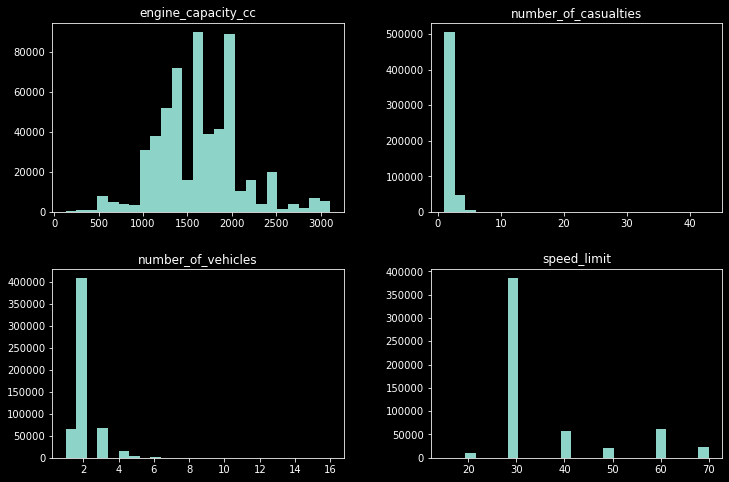

In [45]:
df_num.hist( bins=25, grid=False, figsize=(12,8))
plt.style.use('dark_background')


In [46]:
# #number_of_casualties
df['number_of_casualties'].value_counts()

1     391938
2     113736
3      35451
4      12511
5       4621
6       1739
7        599
8        243
9        146
10        52
11        29
12        28
13        15
16        10
14         4
15         3
17         3
24         2
21         2
19         1
22         1
43         1
Name: number_of_casualties, dtype: int64

In [47]:
#create casualities grouping

def casualities(num_cas):
    if num_cas >=1 and num_cas <2:
        return "1"
    elif num_cas >=2 and num_cas <3:
        return "2"
    elif num_cas >=3 and num_cas <4:
        return "3"
    elif num_cas >= 4 and num_cas <5:
        return "4"
    elif num_cas >= 5:
        return "5+"

In [48]:
 #apply function   
df['number_of_casualties']= df['number_of_casualties'].apply(casualities)

In [49]:
#number_of_casualties
df['number_of_casualties'].value_counts()

1     391938
2     113736
3      35451
4      12511
5+      7499
Name: number_of_casualties, dtype: int64

In [50]:
df['propulsion_code'].value_counts()/df.shape[0]*100

Petrol                 60.540155
Heavy oil              38.544913
Hybrid electric         0.782699
Gas/Bi-fuel             0.094808
Petrol/Gas (LPG)        0.021207
Electric diesel         0.013188
Gas                     0.002317
New fuel technology     0.000356
Gas Diesel              0.000178
Fuel cells              0.000178
Name: propulsion_code, dtype: float64

In [51]:
#Clean the values for Propulsion Code. 
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas", value="Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas/Bi-fuel", value="Bio-fuel")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Petrol/Gas (LPG)", value="LPG Petrol")
df['propulsion_code'] = df['propulsion_code'].replace(to_replace="Gas Diesel", value="Diesel")

In [52]:
df['propulsion_code'].value_counts()/df.shape[0]*100

Petrol                 60.542472
Heavy oil              38.544913
Hybrid electric         0.782699
Bio-fuel                0.094808
LPG Petrol              0.021207
Electric diesel         0.013188
New fuel technology     0.000356
Diesel                  0.000178
Fuel cells              0.000178
Name: propulsion_code, dtype: float64

In [53]:
# #unique values
df.nunique().sort_values(ascending=False)

accident_index                                 412838
longitude                                      356283
latitude                                       346962
lsoa_of_accident_location                       33895
model                                           25688
2nd_road_number                                  5781
1st_road_number                                  5088
date                                             2557
time                                             1439
engine_capacity_cc                               1023
local_authority_district                          380
make                                              226
local_authority_highway                           207
police_force                                       51
vehicle_manoeuvre                                  18
vehicle_type                                       16
number_of_vehicles                                 15
vehicle_reference                                  15
hit_object_in_carriageway   

In [54]:
df['date'] = pd.to_datetime(df['date'])

In [55]:
df['month'] = df ['date'].apply(lambda time: time.month)

In [56]:
#creating a weekend feature that includes Friday-Sunday
df['weekend']= np.where(df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday']), 1, 0)

In [57]:
#create time of day feature with Morning Rush, Day, Noon Rush, Afternoon, After Work Rush, Night

#time of day dictionary
timeofdaygroups = {1: "Morning Rush (6-10)",
                   2: "Day (10-12)",
                   3: "Lunch Rush (12-14)",
                   4: "Afternoon (14-16)",
                   5: "After Work Rush (16-18)",
                   6: "Evening (18-22)",
                   7: "Night (22-6)"}

In [58]:
#pull time data and create hour column
df['hour'] = df['time'].str[0:2]
 
#convert to numeric    
df['hour'] =  pd.to_numeric(df['hour'])

#convert to integer
df['hour'] = df['hour'].astype('int')

In [59]:
#create time_of_day grouping

def daygroup(hour):
    if hour >= 6 and hour < 10:
        return "1"
    elif hour >= 10 and hour < 12:
        return "2"
    elif hour >= 12 and hour < 14:
        return "3"
    elif hour >= 14 and hour < 16:
        return "4"
    elif hour >= 16 and hour < 18:
        return "5"
    elif hour >= 18 and hour < 22:
        return "6"
    else:
        return "7"

In [60]:
#apply function   
#time of day function
df['time_of_day']= df['hour'].apply(daygroup)

In [61]:
df[['weekend','day_of_week','time', 'time_of_day']].tail(10)

,weekend,day_of_week,time,time_of_day
720270,0,Wednesday,08:45,1
720271,0,Wednesday,08:45,1
720272,0,Tuesday,18:12,6
720273,1,Sunday,11:00,2
720274,1,Sunday,11:00,2
720275,0,Monday,16:32,5
720276,0,Monday,16:32,5
720277,1,Friday,06:45,1
720278,0,Tuesday,16:45,5
720279,0,Tuesday,16:45,5


In [62]:
#vehicle_type
df['vehicle_type'].value_counts()/df.shape[0]*100

Car                                      86.052020
Van / Goods 3.5 tonnes mgw or under       5.481212
Motorcycle over 500cc                     3.999929
Taxi/Private hire car                     2.932628
Motorcycle over 125cc and up to 500cc     0.881428
Motorcycle 125cc and under                0.178567
Minibus (8 - 16 passenger seats)          0.140251
Other vehicle                             0.131519
Goods over 3.5t. and under 7.5t           0.083937
Motorcycle 50cc and under                 0.043840
Bus or coach (17 or more pass seats)      0.024771
Goods vehicle - unknown weight            0.015326
Goods 7.5 tonnes mgw and over             0.013188
Motorcycle - unknown cc                   0.013009
Agricultural vehicle                      0.007128
Electric motorcycle                       0.001247
Name: vehicle_type, dtype: float64

In [63]:
#motorcycles
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle over 500cc", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Motorcycle over 125cc and up to 500cc",
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 125cc and under", 
                                                value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle 50cc and under", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Electric motorcycle", 
                                                        value="Motorcycle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Motorcycle - unknown cc", 
                                                        value="Motorcycle")


#Goods_vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Van / Goods 3.5 tonnes mgw or under", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods over 3.5t. and under 7.5t", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods vehicle - unknown weight", 
                                                        value="Goods Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Goods 7.5 tonnes mgw and over", 
                                                        value="Goods Vehicle")

#car
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Taxi/Private hire car", 
                                                        value="Car")


#bus
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Minibus (8 - 16 passenger seats)", 
                                                        value="Bus")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace=
                                                        "Bus or coach (17 or more pass seats)", 
                                                        value="Bus")

#other vehicle
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Agricultural vehicle", 
                                                        value="Other Vehicle")
df['vehicle_type'] = df['vehicle_type'].replace(to_replace="Other vehicle", 
                                                        value="Other Vehicle")

In [64]:
#vehicle_type
df['vehicle_type'].value_counts()/df.shape[0]*100

Car              88.984647
Goods Vehicle     5.593663
Motorcycle        5.118020
Bus               0.165023
Other Vehicle     0.138648
Name: vehicle_type, dtype: float64

In [65]:
#age_band_of_driver 
df['age_band_of_driver'].value_counts()/df.shape[0]*100

26 - 35    22.598662
36 - 45    20.728345
46 - 55    17.551213
21 - 25    12.208827
56 - 65    10.373796
16 - 20     7.145696
66 - 75     5.624850
Over 75     3.757028
11 - 15     0.011049
6 - 10      0.000356
0 - 5       0.000178
Name: age_band_of_driver, dtype: float64

In [79]:
# number_of_vehicles
df['number_of_vehicles'].value_counts()/df.shape[0]*100

2     72.944835
3     11.924403
1     11.570121
4      2.706122
5      0.582747
6      0.167874
7      0.059166
8      0.021385
11     0.005881
9      0.005881
10     0.004277
14     0.002317
13     0.002139
16     0.001782
12     0.001069
Name: number_of_vehicles, dtype: float64

In [80]:
#group number_of_vehicles

def vehicles(num_veh):
    if num_veh >=1 and num_veh <2:
        return "1"
    elif num_veh >=2 and num_veh <3:
        return "2"
    elif num_veh >=3 and num_veh <4:
        return "3"
    elif num_veh >= 4: 
        return "4+"
  
 #apply function   
df['number_of_vehicles']= df['number_of_vehicles'].apply(vehicles)

In [81]:
# number_of_vehicles
df['number_of_vehicles'].value_counts()/df.shape[0]*100

2     72.944835
3     11.924403
1     11.570121
4+     3.560640
Name: number_of_vehicles, dtype: float64

In [82]:
df['number_of_vehicles'].dtypes

dtype('O')

In [83]:
df['number_of_vehicles']=df['number_of_vehicles'].astype('object')

In [84]:
#creating seasons column for ML

#creating season column

def getSeason(month):
    if (month == 12 or month == 1 or month == 2):
        return "winter"
    elif(month == 3 or month == 4 or month == 5):
        return "spring"
    elif(month == 6 or month== 7 or month == 8):
        return "summer"
    else:
        return "autumn"

df['season'] = df['month'].apply(getSeason)

In [85]:
# number_of_vehicles
df['season'].value_counts()/df.shape[0]*100

autumn    27.065858
summer    25.502241
spring    24.624912
winter    22.806989
Name: season, dtype: float64

<AxesSubplot:>

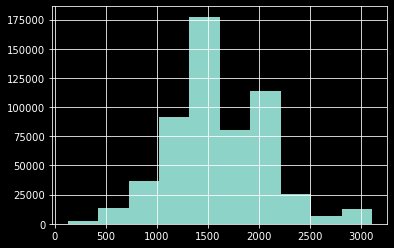

In [86]:
#go back to engine capacity CC and crete groups
df.engine_capacity_cc.hist()

In [87]:
def enginecap(eng_cc):
    if eng_cc <=1500:
        return "small engine cc"
    if eng_cc >1500 and eng_cc <=2000:
        return "medium engine cc"
    if eng_cc >2000:
        return "large engine cc"


df['engine_capacity_cc_size'] = df['engine_capacity_cc'].apply(enginecap)

In [88]:
df.engine_capacity_cc_size.value_counts()

medium engine cc    259881
small engine cc     231031
large engine cc      70223
Name: engine_capacity_cc_size, dtype: int64

In [89]:
#create new column for Machine Learning and Visualizations with Not Serious and Serious
df['accident_seriousness'] = df['accident_severity']
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Slight", 
                                                                value="Not Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Serious",
                                                                value="Serious")
df['accident_seriousness'] = df['accident_seriousness'].replace(to_replace="Fatal", 
                                                                value="Serious")
df.shape

(561135, 60)

In [90]:
df.accident_seriousness.value_counts()

Not Serious    492804
Serious         68331
Name: accident_seriousness, dtype: int64

In [91]:
#pickling everything to speed up restarting
df.to_pickle("df.pkl")

In [92]:
#import pickled file
df = pd.read_pickle("df.pkl")
df.head()

,accident_index,1st_road_class,1st_road_number,2nd_road_number,accident_severity,carriageway_hazards,date,day_of_week,did_police_officer_attend_scene_of_accident,junction_control,...,vehicle_type,was_vehicle_left_hand_drive,x1st_point_of_impact,month,weekend,hour,time_of_day,season,engine_capacity_cc_size,accident_seriousness
0,201001BS70003,B,302,0,Slight,None,2010-01-11,Monday,1,Give way or uncontrolled,...,Goods Vehicle,No,Front,1,0,7,1,winter,small engine cc,Not Serious
1,201001BS70004,A,402,4204,Slight,None,2010-01-11,Monday,1,Auto traffic signal,...,Car,No,Front,1,0,18,6,winter,medium engine cc,Not Serious
3,201001BS70007,Unclassified,0,0,Slight,None,2010-01-02,Saturday,1,Give way or uncontrolled,...,Car,No,Nearside,1,1,21,6,winter,medium engine cc,Not Serious
4,201001BS70007,Unclassified,0,0,Slight,None,2010-01-02,Saturday,1,Give way or uncontrolled,...,Car,No,Front,1,1,21,6,winter,small engine cc,Not Serious
5,201001BS70008,A,3217,3220,Slight,None,2010-01-04,Monday,1,Auto traffic signal,...,Car,No,Nearside,1,0,20,6,winter,medium engine cc,Not Serious
